PREVISÕES COM ARIMA

In [59]:
# Previsões de Série Temporais (ARIMA)
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
from datetime import datetime
#! pip install pmdarima
from pmdarima.arima import auto_arima

In [61]:
# Conversão dos atributos que estão em formato string para formato ano-mês
dataparse = lambda x: datetime.strptime(x, '%Y-%m')
data = pd.read_csv('AirPassengers.csv', parse_dates=['Month'], index_col='Month', date_parser=dataparse)

<ipython-input-61-fd0718183960>:3: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  data = pd.read_csv('AirPassengers.csv', parse_dates=['Month'], index_col='Month', date_parser=dataparse)


In [62]:
data

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


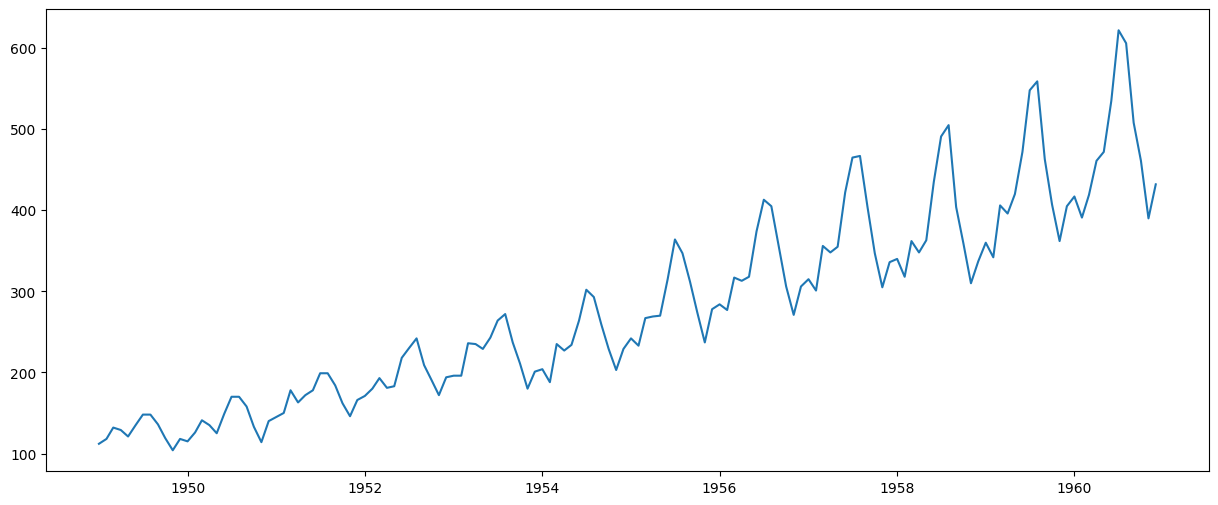

In [63]:
plt.plot(data)

In [64]:
stepwise_model = auto_arima(data, start_p=1, start_q=1, start_d=0, start_P=0, max_p=6,
                            max_q=6, m=12, seasonal=True, trace=True, stepwise=False)

 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1031.508, Time=0.07 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=1030.752, Time=0.25 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=1032.276, Time=0.83 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=1030.408, Time=0.29 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=1032.128, Time=0.65 sec
 ARIMA(0,1,0)(1,1,2)[12]             : AIC=1034.096, Time=1.58 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1032.120, Time=0.46 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=3.48 sec
 ARIMA(0,1,0)(2,1,2)[12]             : AIC=inf, Time=3.43 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=1020.639, Time=0.08 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1021.003, Time=0.25 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=1019.494, Time=0.81 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1020.425, Time=0.19 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=1020.327, Time=0.65 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=1012.991, Time=2.35 sec
 ARIM

In [65]:
print(stepwise_model.aic())

1012.9907964711962


In [66]:
train = data.loc['1949-01-01':'1959-12-01']
test = data.loc['1960-01-01']

In [67]:
train

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1959-08-01,559
1959-09-01,463
1959-10-01,407


In [68]:
test

#Passengers    417
Name: 1960-01-01 00:00:00, dtype: int64

In [69]:
stepwise_model.fit(train)

ARIMA(order=(0, 1, 1), scoring_args={}, seasonal_order=(1, 1, 2, 12),
      suppress_warnings=True, with_intercept=False)

In [70]:
futura_forecast = stepwise_model.predict(n_periods=12)

In [71]:
futura_forecast

1960-01-01    420.248524
1960-02-01    398.467270
1960-03-01    461.924955
1960-04-01    450.705407
1960-05-01    474.027678
1960-06-01    537.927076
1960-07-01    612.254751
1960-08-01    623.611980
1960-09-01    520.187427
1960-10-01    462.338878
1960-11-01    412.953715
1960-12-01    453.780372
Freq: MS, dtype: float64

In [72]:
futura_forecast = pd.DataFrame(futura_forecast, index = test.index, columns=['#Passengers'])

<Axes: >

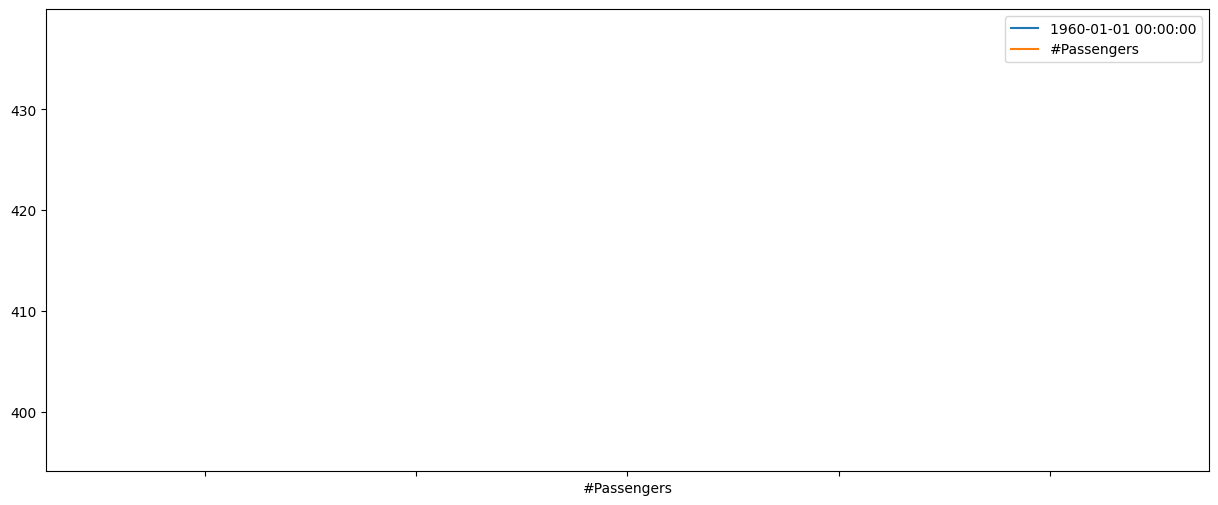

In [73]:
# Azul test laranja forecast
pd.concat([test, futura_forecast], axis=1).plot()

<Axes: >

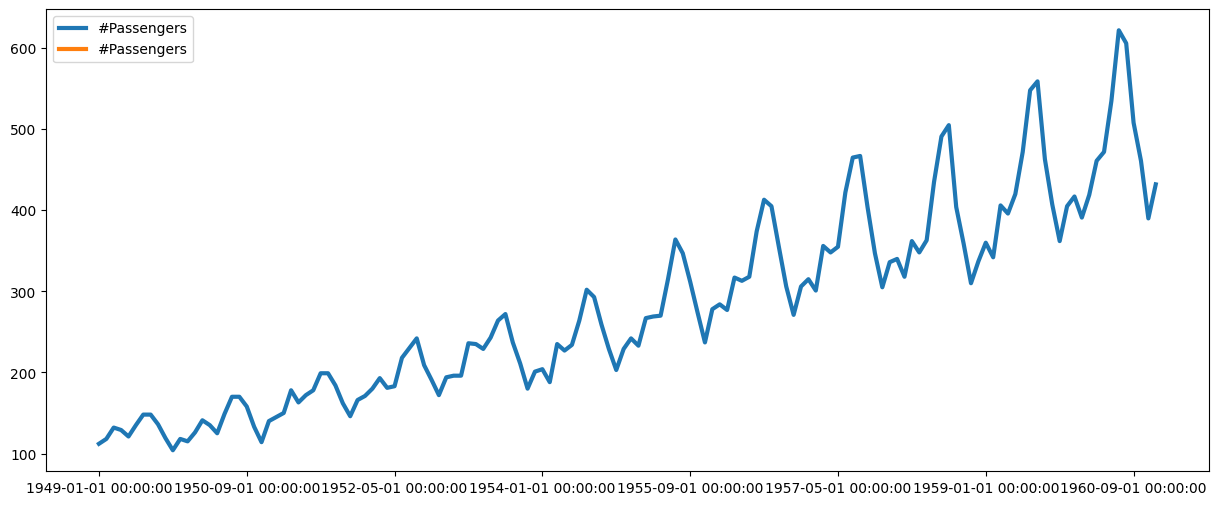

In [74]:
pd.concat([data, futura_forecast], axis=1).plot(linewidth=3)